In [ ]:
import os

# Caminho para a pasta onde os arquivos estão localizados
pasta = 'caminho/para/sua/pasta'

# Padrão para identificar os arquivos
padrao = 'ts_'

# Listar todos os arquivos na pasta
arquivos = [arquivo for arquivo in os.listdir(pasta) if padrao in arquivo]

# Ler e imprimir o conteúdo de cada arquivo
for arquivo in arquivos:
    caminho_completo = os.path.join(pasta, arquivo)
    with open(caminho_completo, 'r') as file:
        conteudo = file.read()
        print(f"Conteúdo do arquivo {arquivo}:\n{conteudo}\n")


In [ ]:
import os
import json
import numpy as np

def ler_arquivo_json(caminho):
    with open(caminho, 'r') as file:
        data = json.load(file)
        # Adaptar esta linha conforme a estrutura de seus dados JSON
        coordenadas = np.array([[particula['x'], particula['y'], particula['z']] for particula in data])
    return coordenadas

def calcular_centro_de_massa(coordenadas):
    return np.mean(coordenadas, axis=0)

def calcular_circulo_minimo(coordenadas, centro_massa):
    distancias = np.sqrt(np.sum((coordenadas - centro_massa)**2, axis=1))
    raio = np.max(distancias)
    return raio

pasta = 'caminho/para/sua/pasta'
padrao = 'ts_'
arquivos = [arquivo for arquivo in os.listdir(pasta) if padrao in arquivo]

for arquivo in arquivos:
    caminho_completo = os.path.join(pasta, arquivo)
    coordenadas = ler_arquivo_json(caminho_completo)
    
    n_amostras = 20
    tamanho_amostra = len(coordenadas) // n_amostras

    for i in range(n_amostras):
        inicio = i * tamanho_amostra
        fim = inicio + tamanho_amostra
        amostra = coordenadas[inicio:fim]
        
        centro_massa = calcular_centro_de_massa(amostra)
        raio = calcular_circulo_minimo(amostra, centro_massa)
        
        print(f"Arquivo: {arquivo}, Amostra: {i+1}, Centro de Massa: {centro_massa}, Raio: {raio}")


In [16]:
import pandas as pd
import numpy as np

In [87]:
fn = '/home/robert/Datas/Fibrils_ext/ts_4096_seed_6010.dat'
df = pd.DataFrame(columns=['id', 'uid', 'x', 'y', 'z'])
df = pd.read_csv(fn,   sep=' ')

In [88]:
# Calculate the mean of the 'y' column
mean_y = int(df['y'].mean())

# Filter rows where 'y' is equal to the mean
filtered_df = df[df['y'] == mean_y]

# Extract 'x' and 'z' values into separate arrays
x_values = filtered_df['x'].to_numpy()
z_values = filtered_df['z'].to_numpy()

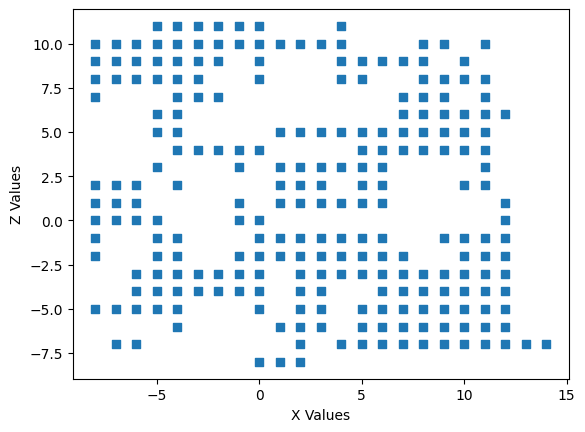

In [89]:
import matplotlib.pyplot as plt

# Plotting
plt.scatter(x_values, z_values, marker = 's')
plt.xlabel('X Values')
plt.ylabel('Z Values')

#plt.xlim(-20,20)
#plt.ylim(-10,10)
plt.show()


In [74]:
z_values

array([  2,   3,   3,   0,   2,   3,   4,   1,   0,   2,   0,  -2,   0,
        -2,  -2,  -3,  -1,   3,   2,   3,   2,   0,  -3,   3,   5,  -1,
         5,   3,   1,   0,   4,  -1,   5,  -4,  -5,   1,  -5,   0,  -4,
         5,   4,   4,  -6,   1,   6,   1,  -1,   4,   4,  -4,   5,   0,
         6,  -1,  -5,  -1,  -5,  -2,  -4,   4,  -6,   0,   4,   5,   7,
        -3,   5,   7,   5,   8,   4,   2,  -6,   8,   5,   5,   2,  -3,
         0,   6,  -6,   6,  -1,   1,   9,   3,   6,  10,   1,   2,   9,
        11,   1,  -6, -10,  -1,   7,  -2,   6,  -5,  -6, -10,  10,   8,
        -4,   5,   2,   9,   9,  -5,  -4,  -5,  -7,   6,  -9,   5,   9,
        -7,   1,  -5,  -5,   6,  -9,   0,   6,   7,   7,   9, -11,  -8,
         0,   6,   0,   2,   6,   6,  -8,   3,   0,   9,   4,   8,  -6,
        10,   8,   8,  11, -14,  10,  -8,  -4,  -9,   7,   9,  -2, -15,
        -7, -12, -14,   8,   7,  -6,   7, -16,  -7,  10,   0,   8,  -2,
         4,   2, -16,   3,   0,   4,  -3,   9,  -1,   9, -13,  -

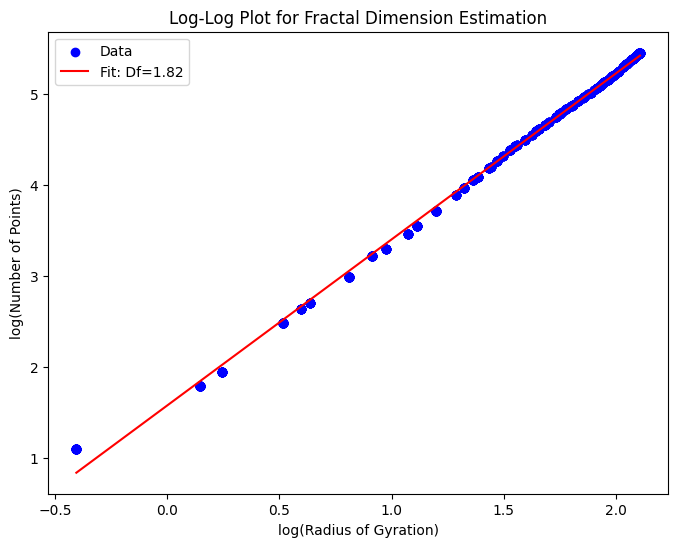

Estimated fractal dimension: 1.82


In [91]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Função para calcular o raio de giração para diferentes escalas
def calculate_rg(points, scales):
    rgs = []
    Ns = []
    for scale in scales:
        # Filtrar pontos dentro da escala atual
        points_within_scale = points[(points[:, 0]**2 + points[:, 1]**2) <= scale**2]

        if len(points_within_scale) > 0:
            # Calcular o centro de massa dos pontos dentro da escala
            r_cm = np.mean(points_within_scale, axis=0)

            # Calcular o raio de giração
            rg = np.sqrt(np.sum((points_within_scale - r_cm)**2) / len(points_within_scale))
            rgs.append(rg)
            Ns.append(len(points_within_scale))
    return rgs, Ns

# Função para ajuste de potência no log-log plot
def power_law(x, a, b):
    return a * x + b

# Simulação de dados fictícios
# Substitua x_values e z_values pelos seus dados reais

points = np.column_stack((x_values, z_values))

# Calcular o centro de massa dos pontos
r_cm = np.mean(points, axis=0)

# Calcular a distância máxima do centro de massa ao ponto mais distante
max_distance = np.max(np.sqrt(np.sum((points - r_cm)**2, axis=1)))

# Definir as escalas usando a distância máxima
scales = np.linspace(1, max_distance, num=1000)

# Calcular os raios de giração e o número de pontos correspondentes
rgs, Ns = calculate_rg(points, scales)

# Realizar o ajuste log-log
log_rgs = np.log(rgs[3:])
log_Ns = np.log(Ns[3:])
params, _ = curve_fit(power_law, log_rgs, log_Ns)

# Extrair a dimensão fractal do ajuste
Df = params[0]  # A inclinação é a dimensão fractal

# Plotar o ajuste
plt.figure(figsize=(8, 6))
plt.scatter(log_rgs, log_Ns, color='blue', label='Data')
plt.plot(log_rgs, power_law(log_rgs, *params), color='red', label=f'Fit: Df={Df:.2f}')
plt.xlabel('log(Radius of Gyration)')
plt.ylabel('log(Number of Points)')
plt.legend()
plt.show()

#print(f"Estimated fractal dimension: {Df:.2f}")


In [79]:
log_Ns

array([0.        , 0.        , 0.69314718, 0.69314718, 0.69314718,
       1.79175947, 2.56494936, 2.56494936, 2.56494936, 2.77258872,
       2.99573227, 3.17805383, 3.17805383, 3.33220451, 3.33220451,
       3.52636052, 3.61091791, 3.66356165, 3.66356165, 3.80666249,
       3.91202301, 3.95124372, 3.98898405, 4.04305127, 4.12713439,
       4.12713439, 4.18965474, 4.20469262, 4.20469262, 4.24849524,
       4.27666612, 4.27666612, 4.30406509, 4.35670883, 4.40671925,
       4.4308168 , 4.48863637, 4.48863637, 4.60517019, 4.66343909,
       4.71849887, 4.71849887, 4.75359019, 4.83628191, 4.88280192,
       4.89034913, 4.91265489, 4.94875989, 5.00394631, 5.04342512,
       5.04342512, 5.08140436, 5.12989871, 5.18178355, 5.19295685,
       5.22035583, 5.24174702, 5.29330482, 5.30330491, 5.33753808,
       5.36597602, 5.38907173, 5.40267738, 5.42495002, 5.43807931,
       5.45532112, 5.46383181, 5.47646355, 5.49306144, 5.49306144,
       5.50533154, 5.5174529 , 5.5174529 , 5.52146092, 5.53338

In [ ]:
fd = [ 1.52, 1.57, ]

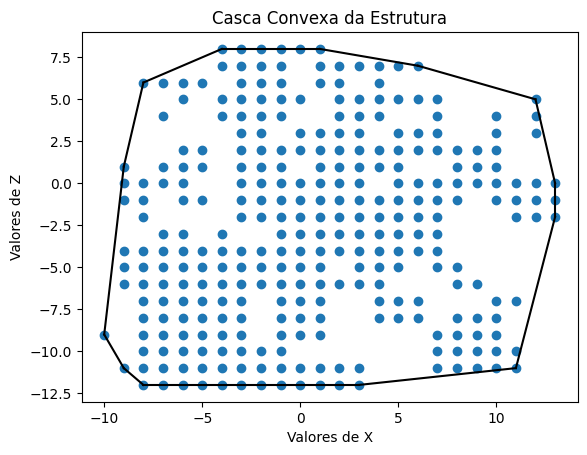

In [30]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import ConvexHull

# Carregar a imagem aqui ou obter os dados dos pontos (X, Z) diretamente
# Se os dados dos pontos estiverem disponíveis, eles podem ser usados diretamente.
# Assumindo que temos os pontos em arrays `x_values` e `z_values`

# Calcular a casca convexa
points = np.column_stack((x_values, z_values))  # Combina os valores X e Z em um conjunto de pontos
hull = ConvexHull(points)

# Plotar os pontos originais
plt.scatter(x_values, z_values)

# Plotar a casca convexa
for simplex in hull.simplices:
    plt.plot(points[simplex, 0], points[simplex, 1], 'k-')

# Adicionar títulos e rótulos se necessário
plt.title('Casca Convexa da Estrutura')
plt.xlabel('Valores de X')
plt.ylabel('Valores de Z')

# Mostrar o gráfico
plt.show()



In [32]:
!pip install shapely

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 7.0 MB/s eta 0:00:00a 0:00:01


In [33]:
from shapely.geometry import MultiPoint, Polygon
from shapely.ops import unary_union, polygonize
from scipy.spatial import Delaunay

# Assumindo que 'points' é um array de seus dados de pontos
points = np.column_stack((x_values, z_values))

# Calcula a triangulação de Delaunay
tri = Delaunay(points)
triangles = [points[simplice] for simplice in tri.simplices]

# Cria polígonos para as triângulos
polygons = [Polygon(triangle) for triangle in triangles]

# Cria um MultiPoint para representar os seus dados
multi_point = MultiPoint(points)

# Usa a união dos polígonos e interseção com o MultiPoint para criar o contorno
union = unary_union(polygons)
contour = [poly for poly in polygonize(union) if poly.intersects(multi_point)]

# Calcula o perímetro do contorno concavo
perimeter = contour[0].length if contour else 0

# Plotagem dos resultados
# Aqui você plotaria `contour[0]` sobre seus dados de pontos para visualizar o contorno
